In [1]:
mf = read.csv('../data/mros_mapping_alpha.txt', sep='\t')
dim(mf)

[1] 598  76

In [2]:
mf$SITE = relevel(mf$SITE, ref='San Diego')

In [3]:
table(mf$SITE)
table(mf$M1ANTIB)


  San Diego  Birmingham Minneapolis   Palo Alto  Pittsburgh    Portland 
        133          75          91          86          92         121 


 0: No 1: Yes 
   557     41 

### Vitamin D measurements ~ Site

Loading required package: ggplot2
Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
Loading required package: magrittr
Warning message:
“Removed 43 rows containing non-finite values (stat_boxplot).”Warning message:
“Removed 43 rows containing non-finite values (stat_compare_means).”Warning message:
“Removed 43 rows containing non-finite values (stat_boxplot).”Warning message:
“Removed 43 rows containing non-finite values (stat_compare_means).”Warning message:
“Removed 32 rows containing non-finite values (stat_boxplot).”Warning message:
“Removed 32 rows containing non-finite values (stat_compare_means).”Warning message:
“Removed 43 rows containing non-finite values (stat_boxplot).”Warning message:
“Removed 43 rows containing non-finite values (stat_compare_means).”Warning message:
“Removed 32 rows containing non-finite values (stat_boxplot).”Warning message:
“Removed 32 rows containing non-finite 

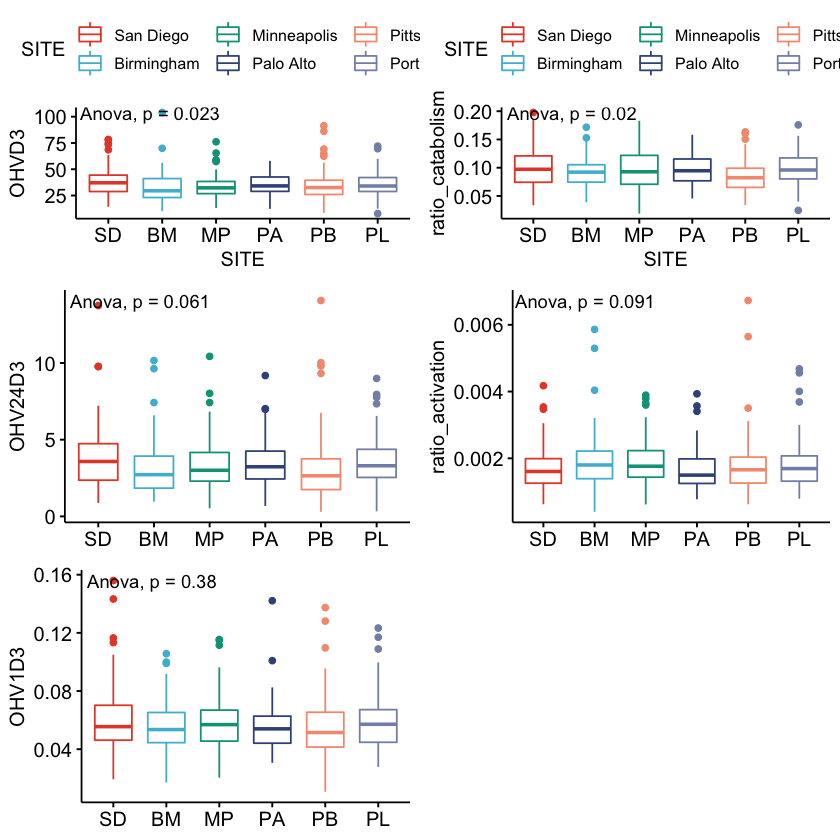

In [4]:
library(gridExtra)
library(ggpubr)
p_25 <- ggboxplot(mf, x = "SITE", y = "OHVD3", color = "SITE", palette = "npg") + 
         stat_compare_means(method='anova') + scale_x_discrete(labels = c('SD','BM','MP', 'PA', "PB", "PL"))

p_cat <- ggboxplot(mf, x = "SITE", y = "ratio_catabolism", color = "SITE", palette = "npg") + 
         stat_compare_means(method='anova') + scale_x_discrete(labels = c('SD','BM','MP', 'PA', "PB", "PL"))

p_24 <- ggboxplot(mf, x = "SITE", y = "OHV24D3", color = "SITE", palette = "npg") + 
         stat_compare_means(method='anova') + scale_x_discrete(labels = c('SD','BM','MP', 'PA', "PB", "PL")) + 
         theme(legend.position = "none", axis.title.x = element_blank()) 

p_act <- ggboxplot(mf, x = "SITE", y = "ratio_activation", color = "SITE", palette = "npg") + 
         stat_compare_means(method='anova') + scale_x_discrete(labels = c('SD','BM','MP', 'PA', "PB", "PL")) + 
         theme(legend.position = "none", axis.title.x = element_blank()) 

p_125 <- ggboxplot(mf, x = "SITE", y = "OHV1D3", color = "SITE", palette = "npg") + 
         stat_compare_means(method='anova') + scale_x_discrete(labels = c('SD','BM','MP', 'PA', "PB", "PL")) +
         theme(legend.position = "none", axis.title.x = element_blank()) 

grid.arrange(p_25, p_cat, p_24, p_act, p_125, ncol=2)

In [6]:
site_comparisons_all <- list(c('San Diego', 'Birmingham'), c('San Diego', 'Minneapolis'), 
                             c('San Diego', 'Palo Alto'), c('San Diego', 'Pittsburgh'), c('San Diego', 'Portland'),
                             c('Birmingham', 'Minneapolis'), c('Birmingham', 'Palo Alto'), 
                             c('Birmingham', 'Pittsburgh'), c('Birmingham', 'Portland'),
                             c('Minneapolis', 'Palo Alto'), c('Minneapolis', 'Pittsburgh'), c('Minneapolis', 'Portland'),
                             c('Palo Alto', 'Pittsburgh'), c('Palo Alto', 'Portland'), c('Pittsburgh', 'Portland'))


Warning message:
“Removed 32 rows containing non-finite values (stat_boxplot).”Warning message:
“Removed 32 rows containing non-finite values (stat_compare_means).”Warning message:
“Removed 32 rows containing missing values (geom_point).”Warning message:
“Removed 32 rows containing non-finite values (stat_boxplot).”Warning message:
“Removed 32 rows containing non-finite values (stat_compare_means).”Warning message:
“Removed 32 rows containing missing values (geom_point).”

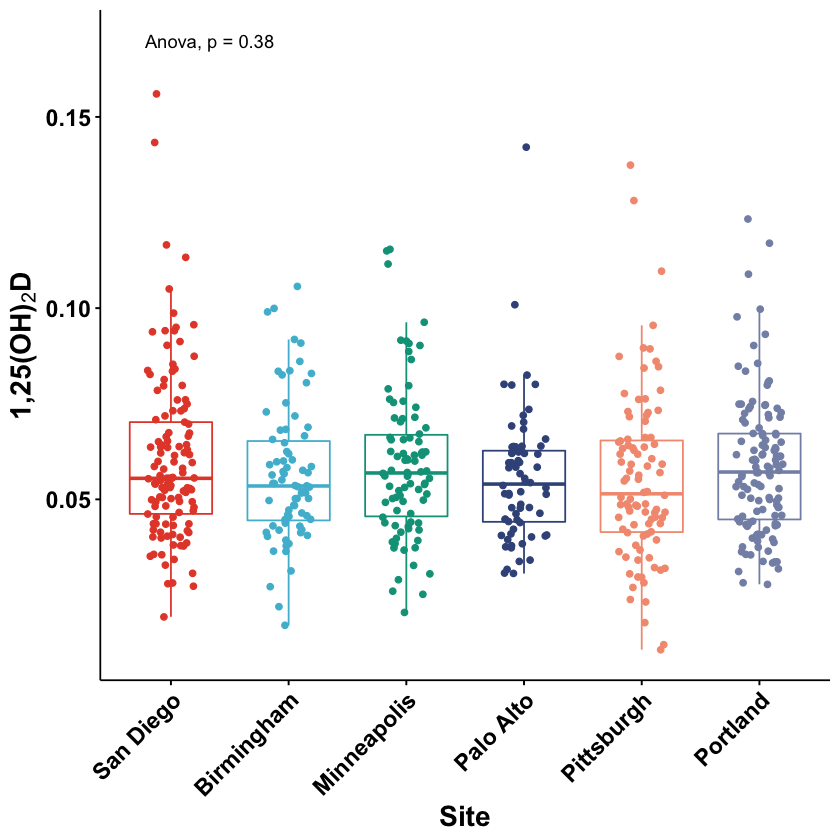

In [29]:
# no significant pairwise comparisons
ggboxplot(mf, x = "SITE", y = "OHV1D3", color = "SITE", palette = "npg", add = "jitter", outlier.shape = NA) + 
#stat_compare_means(comparisons = site_comparisons_all, method='t.test') + # nothing significant
stat_compare_means(method='anova', label.y = 0.17) +  # global p-value 
ylab(expression(bold('1,25(OH)'[2]*'D'))) + xlab('Site') + rotate_x_text(45) +
 theme(axis.text=element_text(size=14, face='bold'), 
       axis.title=element_text(size=17,face="bold"), 
       legend.position="none")
ggsave('../figures/boxplot_125_site.pdf', width=6, height=5)

Warning message:
“Removed 32 rows containing non-finite values (stat_boxplot).”Warning message:
“Removed 32 rows containing non-finite values (stat_signif).”Warning message:
“Removed 32 rows containing non-finite values (stat_compare_means).”Warning message:
“Removed 32 rows containing missing values (geom_point).”Warning message:
“Removed 32 rows containing non-finite values (stat_boxplot).”Warning message:
“Removed 32 rows containing non-finite values (stat_signif).”Warning message:
“Removed 32 rows containing non-finite values (stat_compare_means).”Warning message:
“Removed 32 rows containing missing values (geom_point).”

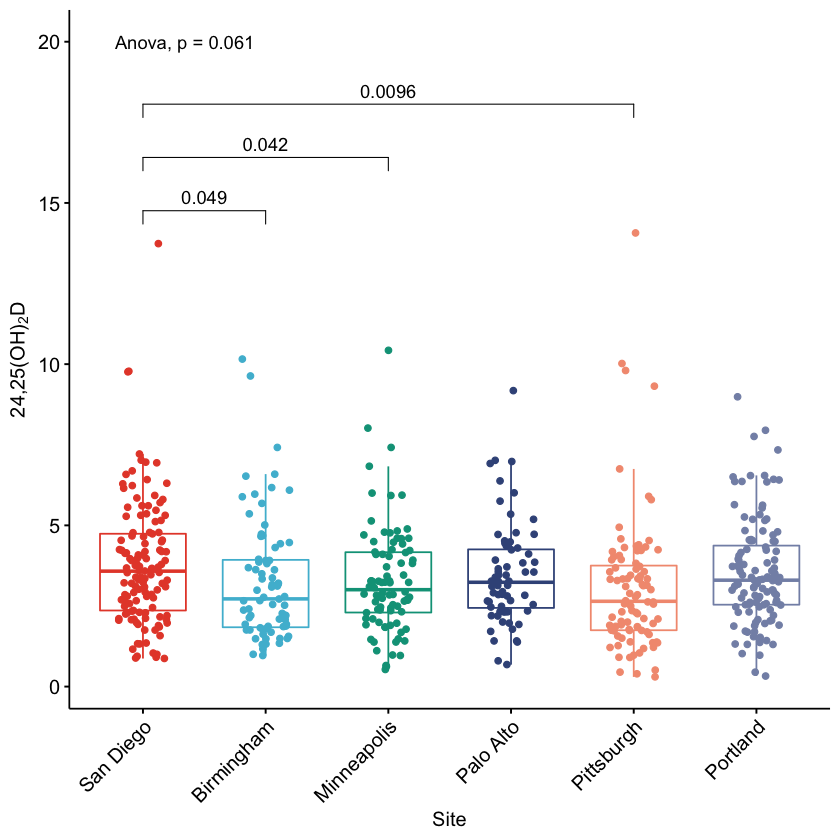

In [21]:
site_comparisons_24 <- list(c('San Diego', 'Birmingham'), c('San Diego', 'Minneapolis'),c('San Diego', 'Pittsburgh'))
ggboxplot(mf, x = "SITE", y = "OHV24D3", color = "SITE", palette = "npg", add = "jitter", outlier.shape = NA) + 
stat_compare_means(comparisons = site_comparisons_24, method='t.test') +
stat_compare_means(method='anova', label.y = 20) +  # global p-value 
ylab(expression('24,25(OH)'[2]*'D')) + xlab('Site') + theme(legend.position='none') + rotate_x_text(45)
ggsave('../figures/boxplot_24_site.pdf', width=6, height=5)

Warning message:
“Removed 43 rows containing non-finite values (stat_boxplot).”Warning message:
“Removed 43 rows containing non-finite values (stat_signif).”Warning message:
“Removed 43 rows containing non-finite values (stat_compare_means).”Warning message:
“Removed 43 rows containing missing values (geom_point).”Warning message:
“Removed 43 rows containing non-finite values (stat_boxplot).”Warning message:
“Removed 43 rows containing non-finite values (stat_signif).”Warning message:
“Removed 43 rows containing non-finite values (stat_compare_means).”Warning message:
“Removed 43 rows containing missing values (geom_point).”

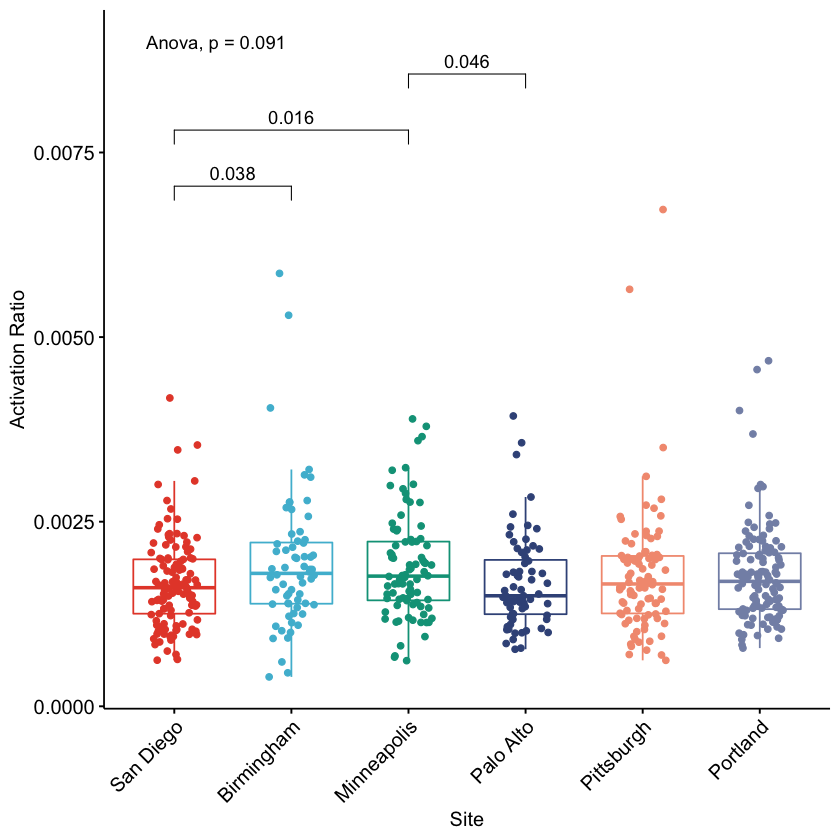

In [22]:
site_comparisons_act <- list(c('San Diego', 'Birmingham'), c('San Diego', 'Minneapolis'), 
                             c('Minneapolis', 'Palo Alto'))
ggboxplot(mf, x = "SITE", y = "ratio_activation", color = "SITE", palette = "npg", add = "jitter", outlier.shape = NA) + 
stat_compare_means(comparisons = site_comparisons_act, method='t.test') + 
stat_compare_means(method='anova', label.y=0.009) +  # global p-value 
ylab(expression('Activation Ratio')) + xlab('Site') + theme(legend.position='none') + rotate_x_text(45)
ggsave('../figures/boxplot_act_site.pdf', width=6, height=5)

Warning message:
“Removed 43 rows containing non-finite values (stat_boxplot).”Warning message:
“Removed 43 rows containing non-finite values (stat_signif).”Warning message:
“Removed 43 rows containing non-finite values (stat_compare_means).”Warning message:
“Removed 43 rows containing missing values (geom_point).”Warning message:
“Removed 43 rows containing non-finite values (stat_boxplot).”Warning message:
“Removed 43 rows containing non-finite values (stat_signif).”Warning message:
“Removed 43 rows containing non-finite values (stat_compare_means).”Warning message:
“Removed 43 rows containing missing values (geom_point).”

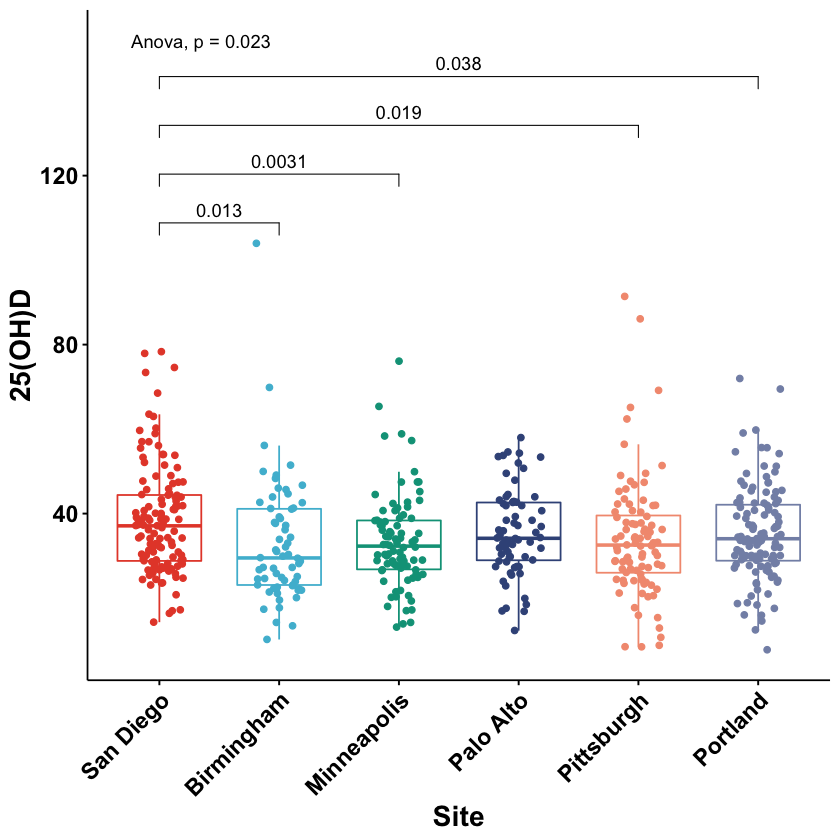

In [25]:
# mostly difference with SD (except SD -- PA; all else pairwise comparions similar)
site_comparisons_OHVD3 <- list(c('San Diego', 'Birmingham'), c('San Diego', 'Minneapolis'), 
                             c('San Diego', 'Pittsburgh'), c('San Diego', 'Portland'))

ggboxplot(mf, x = "SITE", y = "OHVD3", color = "SITE", palette = "npg", add = "jitter", outlier.shape = NA) + 
stat_compare_means(comparisons = site_comparisons_OHVD3, method='t.test') + 
stat_compare_means(method='anova', label.y = 152) + # global p-value 
ylab('25(OH)D') + xlab('Site') + rotate_x_text(45) +
theme(axis.text=element_text(size=14, face='bold'), 
       axis.title=element_text(size=17,face="bold"), 
       legend.position="none")
ggsave('../figures/boxplot_25_site.pdf', width=6, height=5)

Warning message:
“Removed 43 rows containing non-finite values (stat_boxplot).”Warning message:
“Removed 43 rows containing non-finite values (stat_signif).”Warning message:
“Removed 43 rows containing non-finite values (stat_compare_means).”Warning message:
“Removed 43 rows containing missing values (geom_point).”Warning message:
“Removed 43 rows containing non-finite values (stat_boxplot).”Warning message:
“Removed 43 rows containing non-finite values (stat_signif).”Warning message:
“Removed 43 rows containing non-finite values (stat_compare_means).”Warning message:
“Removed 43 rows containing missing values (geom_point).”

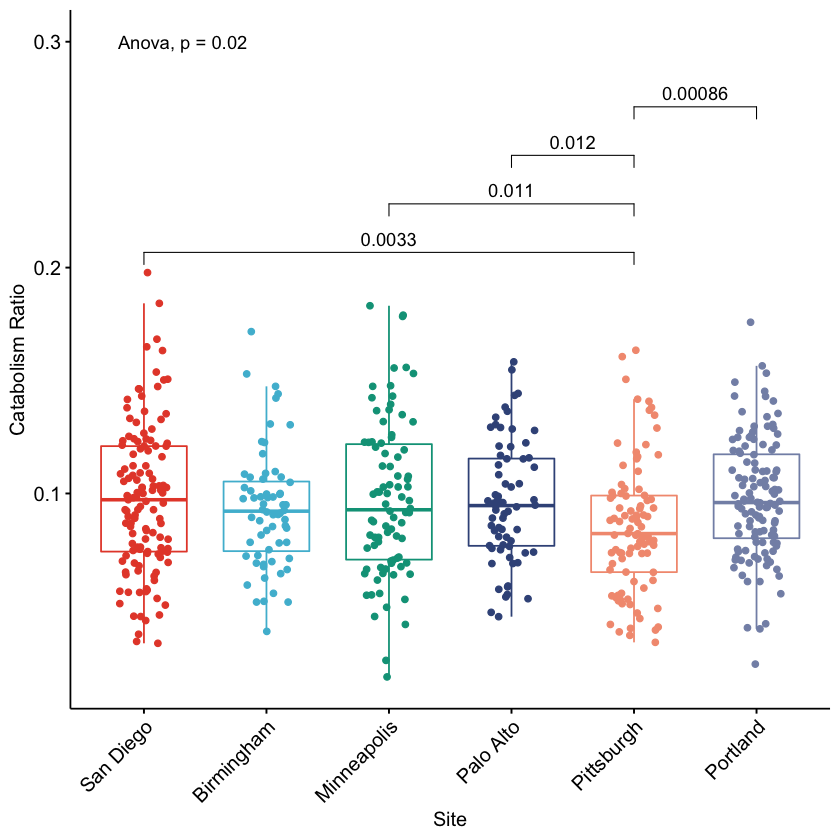

In [21]:
# only significant between Pittsburg and other sites (except PB -- BM)
site_comparisons_cat <- list(c('San Diego', 'Pittsburgh'), c('Minneapolis', 'Pittsburgh'),
                             c('Palo Alto', 'Pittsburgh'), c('Pittsburgh', 'Portland'))

ggboxplot(mf, x = "SITE", y = "ratio_catabolism", color = "SITE", palette = "npg", add = "jitter", outlier.shape = NA) + 
stat_compare_means(comparisons = site_comparisons_cat, method='t.test') + # pairwise comparisons
stat_compare_means(method='anova', label.y = 0.3) + # global p-value
ylab('Catabolism Ratio') + xlab('Site') + theme(legend.position='none') + rotate_x_text(45)
ggsave('../figures/boxplot_cat_site.pdf', width=6, height=5)


### alpha diversity analysis

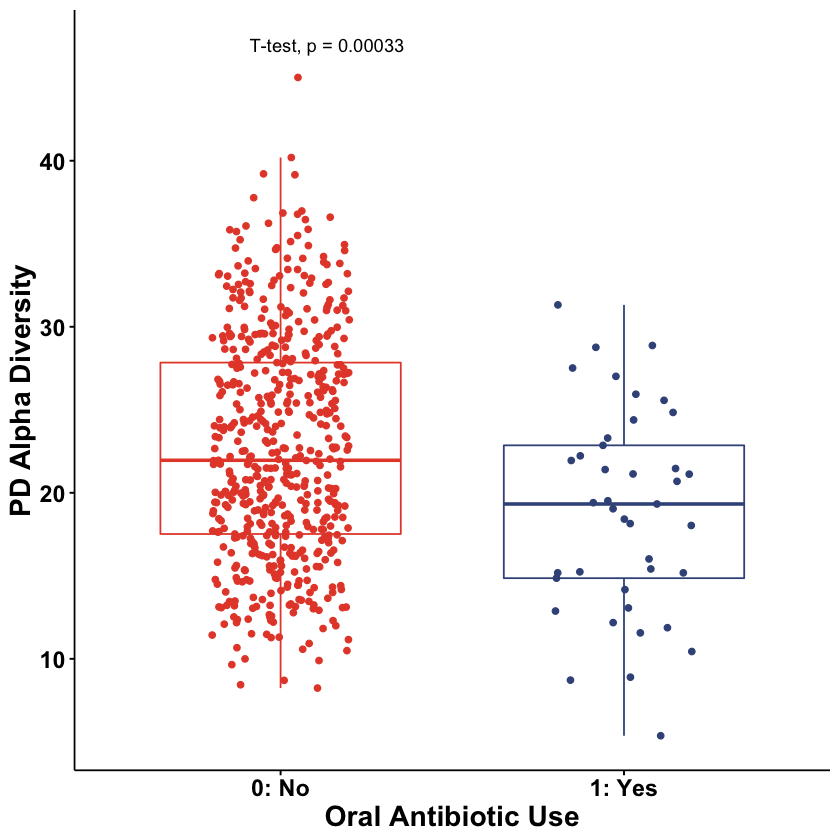

In [19]:
library(ggpubr)
ggboxplot(mf, x = "M1ANTIB", y = "alpha_pd", color = "M1ANTIB", add = "jitter", outlier.shape = NA) + 
stat_compare_means(method='t.test', label.y=47) +
ylab('PD Alpha Diversity') + xlab('Oral Antibiotic Use') + 
scale_color_manual(values = c("#E64B35FF", "#3C5488FF")) + 
theme(axis.text=element_text(size=14, face='bold'), 
      axis.title=element_text(size=17,face="bold"), 
      legend.position="none") 
ggsave('../figures/boxplot_pd_ABX.pdf', width=6, height=5)

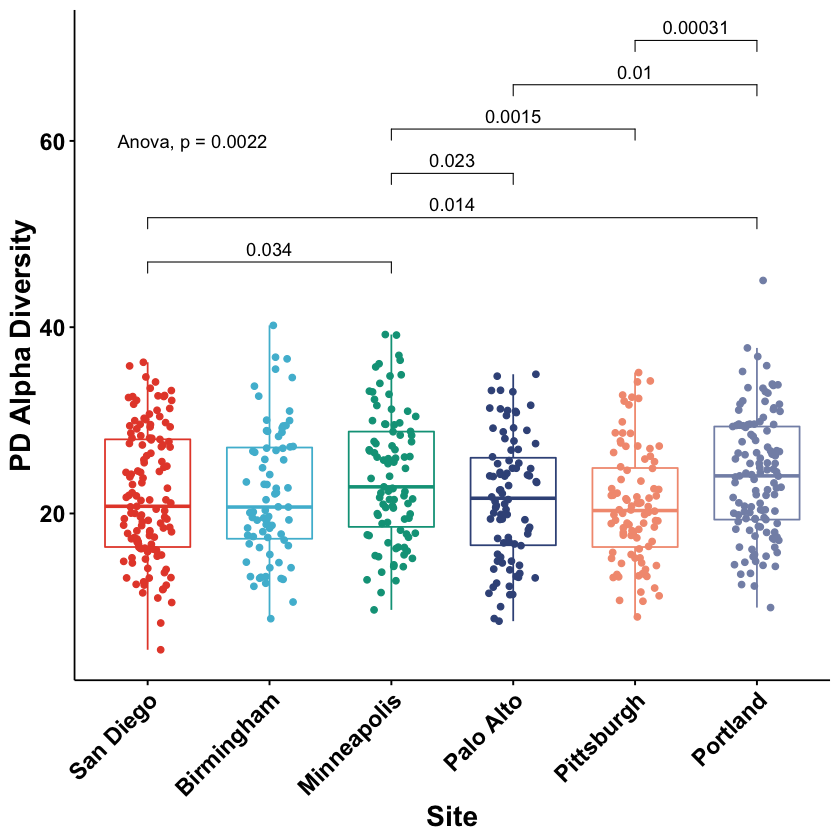

In [35]:
site_comparisons_alpha <- list(c('San Diego', 'Minneapolis'), c('San Diego', 'Portland'), c('Minneapolis', 'Palo Alto'), 
                               c('Minneapolis', 'Pittsburgh'), c('Palo Alto', 'Portland'),  c('Pittsburgh', 'Portland'))

ggboxplot(mf, x = "SITE", y = "alpha_pd", color = "SITE", palette = "npg", add = "jitter", outlier.shape = NA) + 
stat_compare_means(comparisons = site_comparisons_alpha, method='t.test') +
stat_compare_means(method='anova', label.y = 60) + # global p-value
ylab('PD Alpha Diversity') + xlab('Site') + rotate_x_text(45) +
theme(axis.text=element_text(size=14, face='bold'), 
       axis.title=element_text(size=17,face="bold"), 
       legend.position="none")
ggsave('../figures/boxplot_pd_site.pdf', width=6, height=5)

Scale for 'colour' is already present. Adding another scale for 'colour',
which will replace the existing scale.


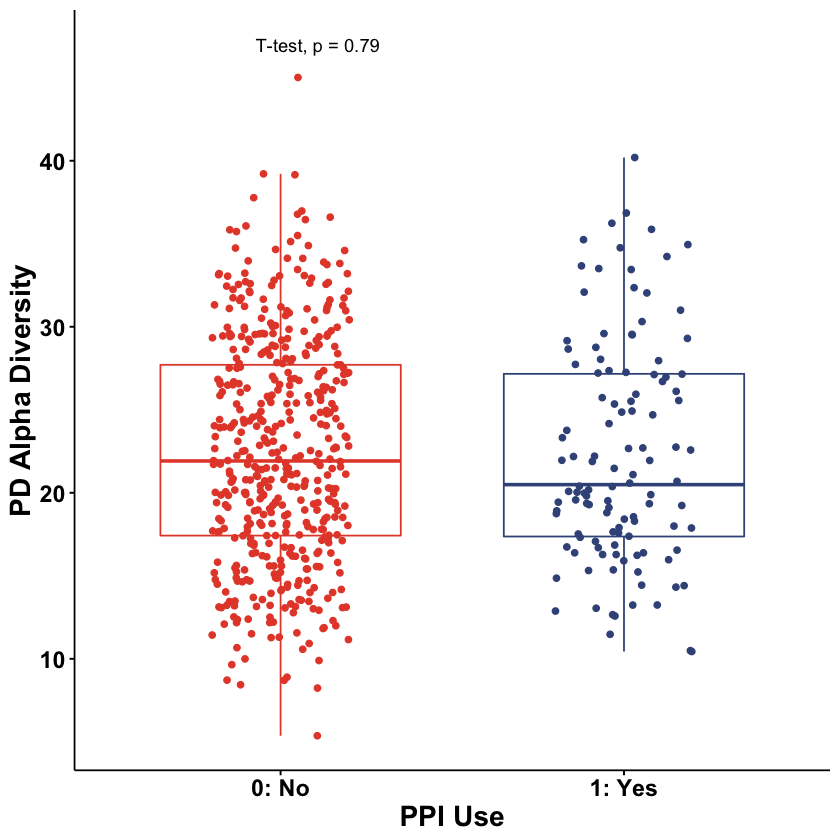

In [20]:
ggboxplot(mf, x = "M1PPUMP", y = "alpha_pd", color = "M1PPUMP", palette = "npg", add = "jitter", outlier.shape = NA) + 
stat_compare_means(method='t.test', label.y=47) +
ylab('PD Alpha Diversity') + xlab('PPI Use') + 
scale_color_manual(values = c("#E64B35FF", "#3C5488FF")) +
theme(axis.text=element_text(size=14, face='bold'), 
       axis.title=element_text(size=17,face="bold"), 
       legend.position="none")
ggsave('../figures/boxplot_pd_PPI.pdf', width=6, height=5)